<a href="https://colab.research.google.com/github/sasya05/adm/blob/main/LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data[:,:2]
y=(iris.target!=0)*1
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")
print("Confusion Matrix:\n",conf_matrix)
print("Classification Report:\n",report)

Accuracy: 1.00
Confusion Matrix:
 [[10  0]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Decision Boundary of Logistic Regression')

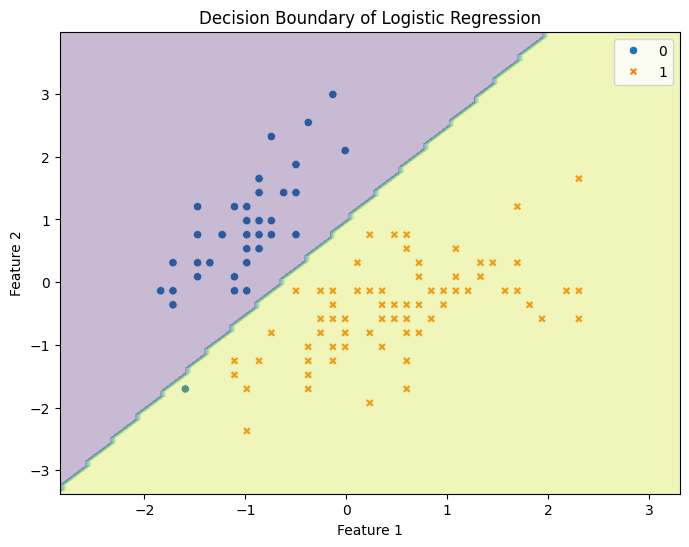

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train,style=y_train)
x_min,x_max=X_train[:,0].min()-1,X_train[:,0].max()+1
y_min,y_max=X_train[:,1].min()-1,X_train[:,1].max()+1
xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
Z=model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Logistic Regression')

In [9]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.to_csv('breast_cancer.csv', index=False)

Accuracy: 0.90
Confusion Matrix:
 [[36  7]
 [ 4 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



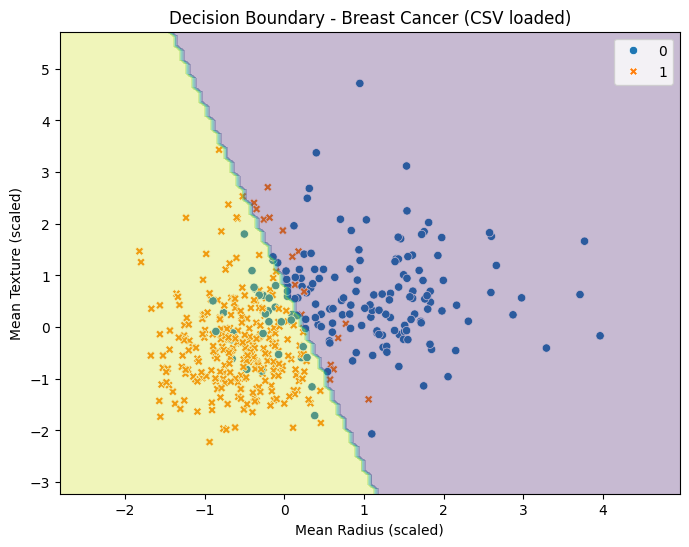

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv('breast_cancer.csv')
df = df[['mean radius','mean texture','target']]
X = df[['mean radius','mean texture']].values
y = df['target'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")
print("Confusion Matrix:\n",conf_matrix)
print("Classification Report:\n",report)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train,style=y_train)
x_min,x_max=X_train[:,0].min()-1,X_train[:,0].max()+1
y_min,siry_max=X_train[:,1].min()-1,X_train[:,1].max()+1
xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max, 100))
Z=model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.xlabel('Mean Radius(scaled)')
plt.ylabel('Mean Texture(scaled)')
plt.title('Decision Boundary - Breast Cancer (CSV loaded)')
plt.show()

Modified Accuracy:0.91
Modified Confusion Matrix:
 [[37  6]
 [ 4 67]]
Modified Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        43
           1       0.92      0.94      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



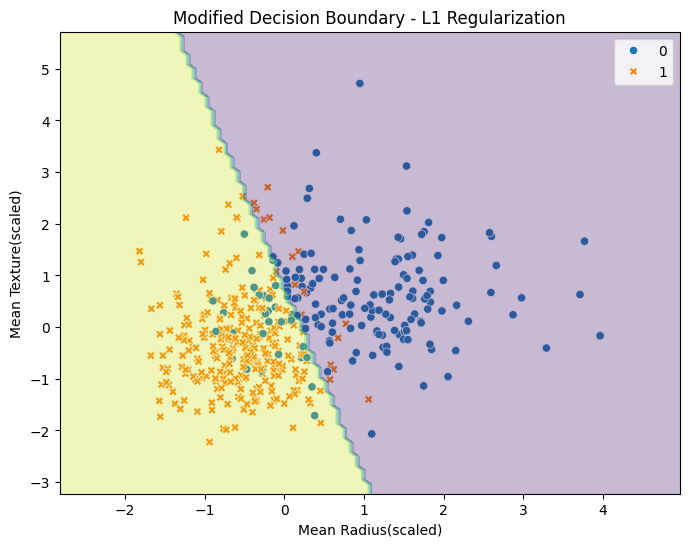

In [11]:
model_mod=LogisticRegression(solver='liblinear',penalty='l1')
model_mod.fit(X_train,y_train)
y_pred_mod=model_mod.predict(X_test)
accuracy_mod=accuracy_score(y_test,y_pred_mod)
conf_matrix_mod=confusion_matrix(y_test,y_pred_mod)
report_mod=classification_report(y_test,y_pred_mod)
print(f"Modified Accuracy:{accuracy_mod:.2f}")
print("Modified Confusion Matrix:\n",conf_matrix_mod)
print("Modified Classification Report:\n",report_mod)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train,style=y_train)
Z_mod=model_mod.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,Z_mod,alpha=0.3)
plt.xlabel('Mean Radius(scaled)')
plt.ylabel('Mean Texture(scaled)')
plt.title('Modified Decision Boundary - L1 Regularization')
plt.show()